# Projeto 2

## Gustavo Pinheiro de Carvalho
## Engenharia 2C

# Descrição do projeto

Predição de uma variável principal em função de demais outras variáveis que podem influenciar em seu comportamento.

<div id="erupcoes"></div>

# <font color='blue'>Base de Dados: Carros elétricos no estado de Washington, nos Estados Unidos.</font> 

   A base de dados `"Electric_Vehicle_Population_Data.csv"` agrupa todos os carros hibrídos e elétricos do estado de Washington, nos Estados Unidos, com números atualizados pela última vez no dia 12 de Novembro de 2020. 
   Nela consta:

Chassis dos carros (VIN);

Lugar onde foram documentados (County, City, State);

Ano do modelo (Model Year);

Marcas (Make);

Modelos (Model);

Tipo de veículo (Electric Vehicle Type);

Autonômia da bateria (Electric Range);

Preço de compra (Base MSRP);

In [1]:
%matplotlib inline
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import statsmodels.api as sm
from mpl_toolkits.mplot3d import Axes3D


from scipy import stats

In [2]:
print(os.getcwd())

/Users/gustavopinheiro/P2-CD20-2


# Análise dos dados

In [3]:
# Lendo o arquivo csv
dados = pd.read_csv('Electric_Vehicle_Population_Data.csv')

dados

,VIN (1-10),County,City,State,ZIP Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location
0,KNDCE3LG3L,King,RENTON,WA,98059,2020,KIA,NIRO,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,239,0,11.0,128569878,POINT (-122.132064 47.494834)
1,KNDCE3LG9K,King,SEATTLE,WA,98108,2019,KIA,NIRO ELECTRIC,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,239,38500,37.0,105987073,POINT (-122.31336800000001 47.54411)
2,KNDCC3LG5L,King,RENTON,WA,98057,2020,KIA,NIRO,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,239,0,37.0,114300301,POINT (-122.215501 47.476576)
3,1G1FY6S00K,Thurston,YELM,WA,98597,2019,CHEVROLET,BOLT,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,238,36620,2.0,113112303,POINT (-122.558621 46.888349)
4,1N4AZ0CP6F,Chelan,LEAVENWORTH,WA,98826,2015,NISSAN,LEAF,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,84,29010,12.0,330944169,POINT (-120.73040299999998 47.74993200000001)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62256,1N4AZ0CP9D,Whatcom,BELLINGHAM,WA,98225,2013,NISSAN,LEAF,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,75,28800,42.0,193481781,POINT (-122.493388 48.74995)
62257,5YJ3E1EB7L,Snohomish,MOUNTLAKE TERRACE,WA,98043,2020,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,322,0,1.0,110482445,POINT (-122.30655200000001 47.792041)
62258,5YJ3E1EB7L,Mason,SHELTON,WA,98584,2020,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,322,0,35.0,7998637,POINT (-123.09921000000001 47.225326)
62259,WBY1Z4C56E,King,SEATTLE,WA,98105,2014,BMW,I3,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,72,41350,46.0,219922678,POINT (-122.298657 47.663771)


/Users/gustavopinheiro/opt/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:829: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/Users/gustavopinheiro/opt/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:830: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


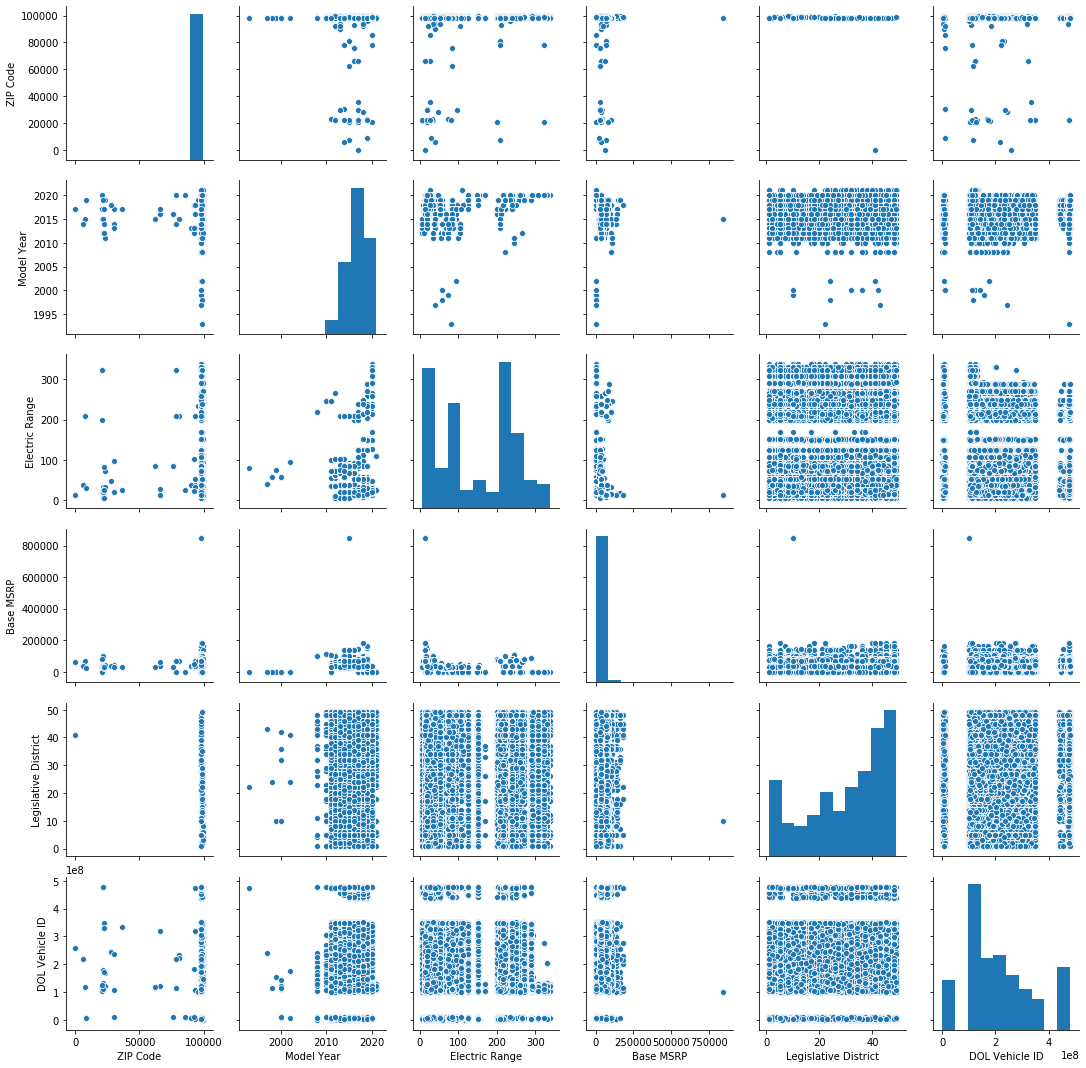

In [4]:
sns.pairplot(dados)

## Tirando as colunas que não serão utilizadas:

A partir da análise dos dados na tabela do database, algumas das variáveis foram julgadas como não relevantes para o objetivo do projeto de analisar o valor de compra para um carro elétrico. Portanto, as variáveis que serão trabalhadas adiante são:

| Variáveis relevantes     |
|:------------------------:|
| Model Year               |
| Make                     |
| Electric Vehycle Type    |
| Electric Range           |
| Base MSRP                |


In [5]:
# Tirando as colunas classificadas como outliers

colunas = ['Model Year', 'Make', 'Electric Vehycle Type', 'Electric Range', 'Base MSRP']
dados = dados.drop(columns=['VIN (1-10)'])
dados = dados.drop(columns=['County'])
dados = dados.drop(columns=['City'])
dados = dados.drop(columns=['State'])
dados = dados.drop(columns=['ZIP Code'])
dados = dados.drop(columns=['Model'])
dados = dados.drop(columns=['Clean Alternative Fuel Vehicle (CAFV) Eligibility'])
dados = dados.drop(columns=['Legislative District'])
dados = dados.drop(columns=['DOL Vehicle ID'])
dados = dados.drop(columns=['Vehicle Location'])


## Selecionando apenas modelos 100% elétricos:

No database, recebemos dados para diversos tipos de veículos com propostas sustentáveis. Porém, nesse projeto, desejamos trabalhar apenas com os modelos movidos exclusivamente por baterias.

In [6]:
dados = dados.loc[dados['Electric Vehicle Type'] == 'Battery Electric Vehicle (BEV)',:]

# Análise das variáveis:

## Valor de compra (Base MSRP):

Text(0, 0.5, 'Número de veículos')

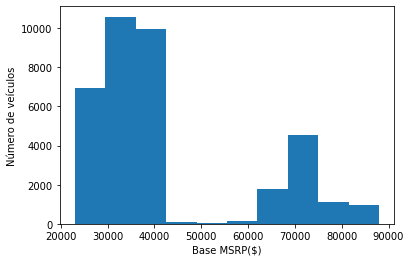

In [49]:
plt.hist(dados['Base MSRP'], bins=10)
plt.xlabel('Base MSRP($)')
plt.ylabel('Número de veículos')
#sns.distplot(dados['Base MSRP'], color='darkcyan')

Ao analisar os dados dos valores de compra dos carros, podemos observar duas concentrações maiores, além da concentração de dados de valores nulos para alguns veículos no início.

### Valor de compra (Base MSRP) X Ano do modelo (Model Year) 

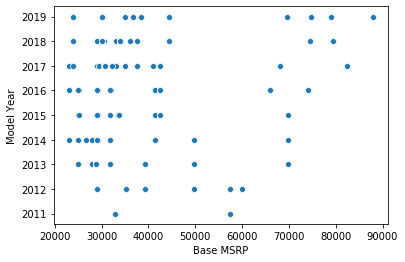

In [34]:
sns.scatterplot(dados['Base MSRP'], dados['Model Year'])


Pela análise do gráfico, podemos perceber alguns dados possuem valores de compra que fogem da normalidade, que podem ser explicados pelo fato de estarem presentes em carros mais antigos, e a tecnologia para o desenvolvimento de um carro elétrico, na época, era pouco estudada e excessivamente cara.

Tais dados, se enquadram como OUTLIERS, por fugirem muito da normalidade do restante dos dados, e serão retirados a fim de evitar quaisquer anomalias nos resultados dos modelos de predição.

Além disso, alguns veículos não apresentam um valor de compra na base de dados, e serão excluídos da mesma.

In [37]:
dados = dados.drop(dados[dados['Base MSRP'] > 90000].index)
dados = dados.drop(dados[dados['Base MSRP'] <= 0].index)

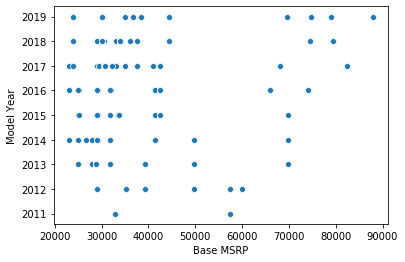

In [38]:
sns.scatterplot(dados['Base MSRP'], dados['Model Year'])

### Valor de compra (Base MSRP) X Autonomia da bateria (Electric Range)

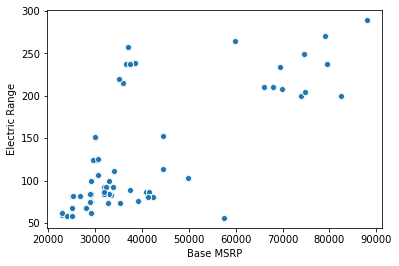

In [14]:
sns.scatterplot(dados['Base MSRP'], dados['Electric Range'])

A análise do gráfico entre o valor de compra (Base MSRP) e a autonomia da bateria (Electric Range) mostra que a uma concentração maior de dados com base MSRP entre 20000 e 50000 doláres, e de autonômia da bateria entre 50 e 150 milhas. 

## Autonomia da bateria (Electric Range):

Text(0, 0.5, 'Número de veículos')

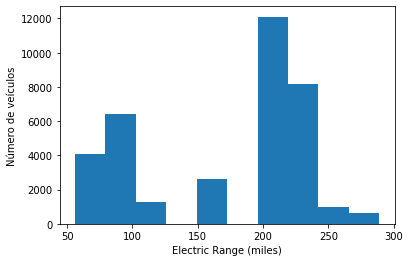

In [76]:
plt.hist(dados['Electric Range'], bins=10)
plt.xlabel('Electric Range (miles)')
plt.ylabel('Número de veículos')

## Ano do modelo (Model Year):

Text(0, 0.5, 'Número de veículos')

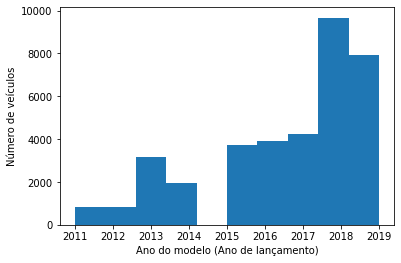

In [77]:
plt.hist(dados['Model Year'], bins=10)
plt.xlabel('Ano do modelo (Ano de lançamento)')
plt.ylabel('Número de veículos')

## Montadora/Marca (Make):

### Porcentagem de carros por montadora de veículos:

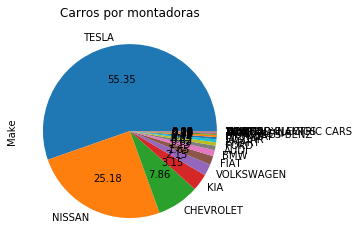

In [10]:
make = dados.Make.value_counts()
make.plot(kind='pie', title='Carros por montadoras', autopct="%.2f")

Pela análise das porcentagens de veículos para cada uma das montadoras/marcas, percebemos que a Tesla representa aproximadamente metade dos veículos registrados na database, seguida pela Nissan e pela Chevrolet.

A Tesla e a Nissan, juntas, possuem, aproximadamete, a fabricação de 80% dos carros elétricos registrados em Washington.

## Média do valor dos carros de cada montadora na database:

In [69]:
premium = dados.groupby(by=['Make'])['Base MSRP'].mean()
#pd.crosstabpremium
premium
valor_medio = dados.loc[:, ['Make', 'Base MSRP']].groupby(by='Make').mean().round(decimals=0)
valor_medio
#valor_medio = dados.loc[['Make'], ['Base MSRP']].groupby(by='Make').mean().round(decimals=0)
#dados['Premium'] = '0'
#if valor_medio['Base MSRP'] > 50000:
    
    

,Base MSRP
Make,
AUDI,74800.0
AZURE DYNAMICS,57400.0
BMW,42521.0
CHEVROLET,36233.0
FIAT,32014.0
FORD,33024.0
HONDA,37510.0
HYUNDAI,34829.0
JAGUAR,69500.0


Na análise dos valores médios de compra dos carros referentes a cada uma das montadoras

In [62]:
dados['Premium'] = '0'
#if dados(dados['Make'](dados['Base MSRP'])).mean() >= 50000:
    #df.loc[index,'Premium'] =  (df.loc[index, '1'])
def getCategory(row):
    if row['Base MSRP']>=50000:
        return 1
    else:
        return 0
    
dados['Premium'] = dados.apply(getCategory, axis=1)
dados['Premium']

SyntaxError: invalid syntax (<ipython-input-62-5f92df27ec6a>, line 5)

## Observando os gráficos e os seus valores

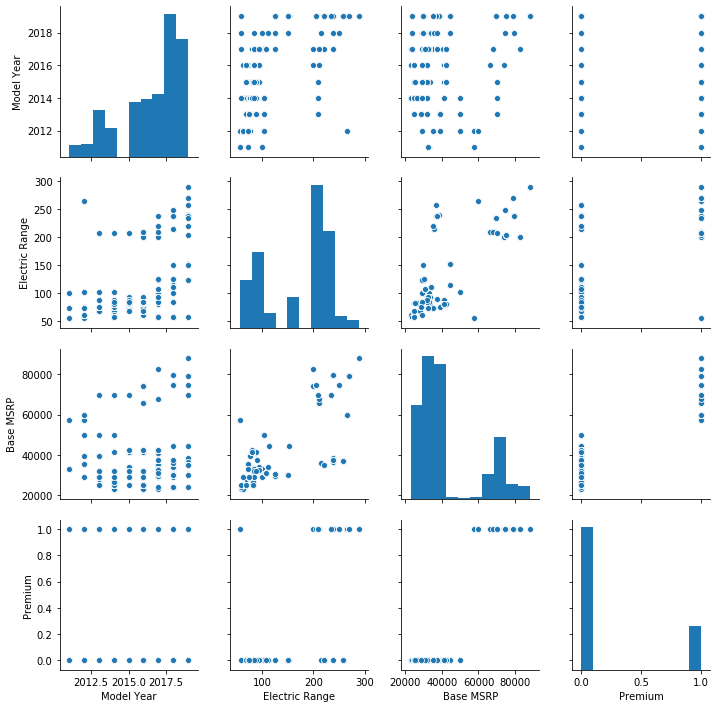

In [18]:
sns.pairplot(dados)

# Dividindo a database entre dados de treinamento e dados de teste:

A função `train_test_split` recebe vários opções de parâmetros. Para separar os nossos dados de treinamento e de teste, focaremos em 3 deles:

* Valores de X 
 
* Valores de Y

* Tamanho do teste (test_size). O tamanho do teste possui um valor que varia de 0 a 1, e representa a % de dados que queremos que seja utilizada apenas para teste.

A função retorna 4 parâmetros:

* X_train: X_TRAINING DATA

* X_test: X_TESTING DATA

* y_train: Y_TRAINING DATA

* y_test: Y_TESTING DATA


In [19]:
from sklearn.model_selection import train_test_split

In [20]:
Y = dados['Base MSRP']
#X = dados.drop(columns=['Base MSRP', 'Make', 'Battery Electric Vehicle (BEV)'])
#X = dados[['Model Year', 'Electric Range', 'Premium']]
X = dados[['Model Year', 'Electric Range']]
X

,Model Year,Electric Range
1,2019,239
3,2019,238
4,2015,84
6,2017,238
8,2019,150
...,...,...
62251,2018,238
62252,2019,220
62254,2017,107
62256,2013,75


In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.25)

In [22]:
#X_train = np.array(X_train).reshape(-1, 1)
#X_test = np.array(X_test).reshape(-1, 1)
X_train

,Model Year,Electric Range
61015,2015,84
48127,2018,215
34027,2015,87
7144,2018,238
16860,2013,75
...,...,...
55662,2019,220
31321,2013,76
46759,2019,220
1538,2018,215


In [23]:
#y_train = np.array(y_train)
#y_test = np.array(y_test)
y_train

61015    29010
48127    36000
34027    31800
7144     79500
16860    28800
         ...  
55662    35000
31321    39200
46759    35000
1538     36000
44722    36000
Name: Base MSRP, Length: 27177, dtype: int64

# Objetivo do projeto

## O objetivo desse projeto será prever uma variável principal em função de demais outras variáveis que podem influenciar em seu comportamento.
 
   Nesse caso, utilizaremos o valor de compra para a nossa variável target. Ou seja, nesse projeto desejamos prever um valor de compra para um novo carro elétrico que será introduzido no mercado no estado de Washington baseado em outras variáveis como a autonômia da bateria, o ano do modelo e o fabricante.



## Problema:

Desejamos prever o valor de compra de um carro elétrico no estado de Washington, nos Estados Unidos (Base MSRP) em função da autonômia do carro (Electric Range), o ano do modelo (Model Year) e a proposta da montadora (Premium ou não).

### Y : variável dependente (resposta): Base MSRP
### X : variável independentes (explicativa): Electric Range, Model Year, 

### Portanto, o modelo do projeto fará uma associação de Y em função de uma variável explicativa X

# 1 Modelo do projeto: Regressão Linear Múltipla

A análise de regressão estuda a relação entre uma variável chamada de 'variável dependente' e outras variáveis chamadas de 'variáveis independentes'.

 Este modelo é designado por modelo de regressão linear múltipla, na qual se define uma relação linear entre a variável dependente as variáveis independente.

*Y* : variável dependente (resposta) - variável obrigatoriamente quantitativa, cujo comportamento se deseja explicar (efeito).

*X* : variáveis independentes (explicativas) - variáveis que são utilizadas para explicar a variável dependente.

*Modelo de regressão linear Múltipla*: modelo que associa *Y* em
função de variáveis explicativas *X*.

In [25]:
### Função utilitária para fazer a regressão com constante adicionada

def regress(Y,X):
    '''
    Y: coluna do DataFrame utilizada como variável resposta (TARGET)
    X: colunas do DataFrame utilizadas como variáveis) explicativas (FEATURES)
    '''
    X_cp = sm.add_constant(X)
    model = sm.OLS(Y,X_cp)
    results = model.fit()
    
    return results

results = regress(y_train,X_train)
results.summary()

/Users/gustavopinheiro/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              Base MSRP   R-squared:                       0.461
Model:                            OLS   Adj. R-squared:                  0.461
Method:                 Least Squares   F-statistic:                 1.161e+04
Date:                Sat, 28 Nov 2020   Prob (F-statistic):               0.00
Time:                        13:10:23   Log-Likelihood:            -2.9540e+05
No. Observations:               27177   AIC:                         5.908e+05
Df Residuals:                   27174   BIC:                         5.908e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const           8.914e+06    9.4e+04     94.849      0.000    8.73e+06     9.1e+06
Model Year     -4419.1553     46.687    -94.654      0.000   -4510.665   -4327.646
Electric Range   237.8242      1.562    152.219      0.000     234.762     240.887
==============================================================================
Omnibus:                     2766.415   Durbin-Watson:                   2.005
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3695.806
Skew:                           0.897   Prob(JB):                         0.00
Kurtosis:                       3.215   Cond. No.                     2.47e+06
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.47e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [26]:
beta0_hat = results.params[0]  # const
beta1_hat = results.params[1]  # Model Year
beta2_hat = results.params[2]  # Electric Range

In [27]:
def f(feature1, feature2):
    return beta0_hat + beta1_hat*feature1 + beta2_hat*feature2

In [28]:
# Gera 100 pontos entre os menores e maiores valores de cada feature
npoints = 100
feature1 = X["Model Year"]
feature2 = X["Electric Range"]
x_vc = np.linspace(feature1.min(), feature1.max(), npoints)
y_vc = np.linspace(feature2.min(), feature2.max(), npoints)



In [29]:
# Constrói uma grade de 100x100 pontos 
eixo_x, eixo_y = np.meshgrid(x_vc, y_vc)

In [30]:
# Aplica a função em cada ponto da grade 
# Constrói plano estimado
fit_z = f(eixo_x, eixo_y)

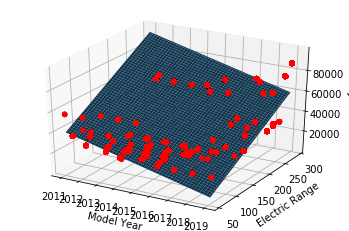

In [31]:
# Plota os pontos e o plano em 3D
plt3d = plt.figure().gca(projection="3d")
plt3d.plot_surface(eixo_x, eixo_y, fit_z)
plt3d.scatter(feature1, feature2, Y, color="r")
plt3d.set_xlabel("Model Year")
plt3d.set_ylabel("Electric Range")
plt3d.set_zlabel("Y")
plt.show()

In [71]:
#X_train = np.array(X_train).reshape(-1, 1)
#X_test = np.array(X_test).reshape(-1, 1)

#y_train = np.array(y_train)
#y_test = np.array(y_test)

from sklearn import datasets, linear_model
from sklearn.metrics import accuracy_score
#from sklearn.metrics import mean_squared_error, r2_score

# Create linear regression object
regr = linear_model.LinearRegression()

# Train the model using the training sets
regr.fit(X_train, y_train)

# Make predictions using the testing set
y_predito = regr.predict(X_test)
print(accuracy_score(y_test, y_predito))
# Plot outputs
#plt.scatter(X_test, y_test, color='blue')
#plt.plot(X_test, y_predito, color='red', linewidth=3)
#plt.xlabel("Base MSRP ($)")
#plt.ylabel("Electric Range")
#plt.title("Regressão Linear Simples")

#plt.xticks(())
#plt.yticks(())

#plt.show()

ValueError: Classification metrics can't handle a mix of multiclass and continuous targets

## RMSE: erro quadrático médio da raiz

 O RMSE representa a diferença entre o valor que foi previsto pelo modelo e o valor real

In [74]:
from sklearn.metrics import mean_squared_error
from math import sqrt

rmse = sqrt(mean_squared_error(y_test, y_predito))
rmse

#p'O valor do RMSE do modelo foi de {0}.format'

12853.679717945166

## $R^2$ ajustado

Penaliza preditores que não acrescentam poder preditivo significativo. Essa medida é útil em modelo de regressão múltipla.

$$R^2ajustado = R^2 - (1-R^2)\frac{P}{n-p-1}$$

em que $n$ é o número de dados e $p$ é o número de preditores (número de variáveis explicativas)

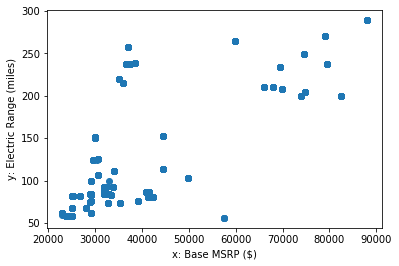

In [21]:
#x_dados = carros_eletricos['Base MSRP'] # Definindo renda como explicativa
#y_dados = carros_eletricos['Electric Range']    # Definindo CO2 como resposta

x_dados = X_train # Dados de Base MSRP para treinamento
y_dados = y_train # Dados de Electric Range para treinamento

plt.scatter(x_dados,y_dados);
plt.xlabel("x: Base MSRP ($)");
plt.ylabel("y: Electric Range (miles)");

In [24]:
# Outra maneira de obter o coeficiente angular, pois Sxy/Sxx = Cov(x, y)/Var(x)
x_dados.cov(y_dados)/x_dados.var()
print(f'Coeficiente angular betaˆ1 = {x_dados.cov(y_dados)/x_dados.var():.5f}')

Coeficiente angular betaˆ1 = 0.00200


In [25]:
Sxy = ((x_dados - x_barra)*(y_dados - y_barra)).sum()
Sxx = ((x_dados - x_barra)**2).sum()

b1 = Sxy/Sxx
b0 = y_barra - b1*x_barra

print(f'Coeficiente linear betaˆ0 = {b0:.5f}')
print(f'Coeficiente angular betaˆ1 = {b1:.5f}')

print(f'y^ = {b0:.5f} + {b1:.5f}x')

Coeficiente linear betaˆ0 = 86.59619
Coeficiente angular betaˆ1 = 0.00200
y^ = 86.59619 + 0.00200x


<div id="verificando-resultados"></div>

### Verificando os resultados da regressão

Vamos contrastar a reta estimada pelo modelo de regressão com os dados observados.

Para tanto, serão construídos:
 * `x_vec`: vetor de valores considerando a amplitude dos dados que estão no `eixo x`
 * `y_vec`: vetor com valores ajustados para y a partir de um valor de `x_vec`, considerando os coeficentes da reta

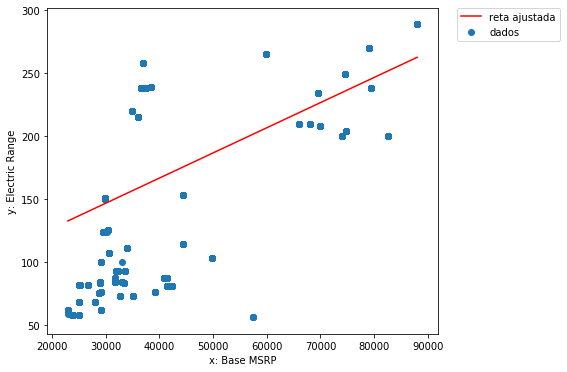

In [26]:
x_vec = np.linspace(x_dados.min(), x_dados.max(), 500)
y_vec = b0 + b1*x_vec

plt.figure(figsize=(7,6))
plt.plot(x_vec,y_vec, color="r") # resultados da regressão
plt.scatter(x_dados, y_dados); # dados da Base MSRP e Eletric Range
plt.xlabel("x: Base MSRP")
plt.ylabel("y: Electric Range")
plt.legend(('reta ajustada','dados'), bbox_to_anchor=(1.05, 1), borderaxespad=0.)
plt.show()

# Resíduos: 

 Se os resíduos forem pequenos temos uma indicação de que o modelo está produzindo bons resultados.

e = y − yˆ = y − αˆ − β x


In [27]:
residuos = y_dados - (b0 + b1*x_dados)

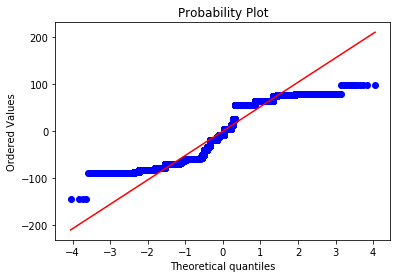

In [28]:
y_predito = b0 + b1*x_dados
residuos = y_dados - y_predito

stats.probplot(residuos, dist='norm', plot=plt,);

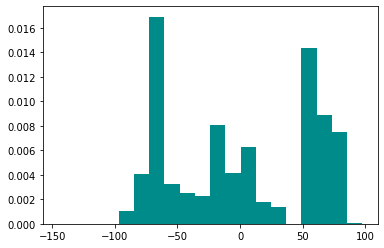

In [29]:
plt.hist(residuos, density=True, color='darkcyan', bins=20);

<div id="usando-ols"></div>

### Usando `statsmodels.OLS`

Agora que estão familiarizados com algumas medidas obtidas na "raça" calculando $\hat{beta}_0$ e $\hat{beta}_1$ com as expressões obtidas pelo método dos mínimos quadrados, vamos aprender como utilizar a função `OLS()` da biblioteca `statsmodel` e interpretar os resultados.

In [30]:
import statsmodels.api as sm # Importe da biblioteca

In [31]:
# Repetindo - mas já fizemos isso anteriormente
#x_dados = carros_eletricos['Base MSRP'] # Definindo preço de compra como explicativa
#y_dados = carros_eletricos['Electric Range']    # Definindo Autonômia da bateria como resposta

# Matriz de 1s e valores de x_dados
X_dados = sm.add_constant(x_dados) # Adiciona coluna de 1s para estimar intercepto junto com a coluna de x (dados)

/Users/gustavopinheiro/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [32]:
# Define o modelo
model = sm.OLS(y_dados, X_dados)  #sm.OLS(variável target, matriz com as features)  

# Faz o ajuste
results = model.fit()   

# Mostra os resultados
results.summary()      

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         Electric Range   R-squared:                       0.283
Model:                            OLS   Adj. R-squared:                  0.283
Method:                 Least Squares   F-statistic:                 1.073e+04
Date:                Tue, 24 Nov 2020   Prob (F-statistic):               0.00
Time:                        14:38:08   Log-Likelihood:            -1.4758e+05
No. Observations:               27177   AIC:                         2.952e+05
Df Residuals:                   27175   BIC:                         2.952e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         86.5962      0.888     97.533      0.000      84.856      88.336
Base MSRP      0.0020   1.93e-05    103.578      0.000       0.002       0.002
==============================================================================
Omnibus:                   155764.232   Durbin-Watson:                   2.004
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2618.807
Skew:                           0.002   Prob(JB):                         0.00
Kurtosis:                       1.479   Cond. No.                     1.22e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.22e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

**AGORA USE A SAIDA do OLS Regression Results**

Como resultado do `statsmodels.OLS` obtivemos a tabela acima, que contém diversas informações e pode ser um pouco intimidadora em um primeiro contato. Inicialmente estamos interessados apenas nos valores de $\hat\beta_0$ (intercepto: `const`) e $\hat\beta_1$ (inclinação da reta: `Base MSRP`). Esses valores podem ser encontrados na coluna `coef` do *output* do OLS Regression Results. Posteriormente vamos entender algumas das outras informações disponíveis nesse resultado.

In [33]:
beta0 = results.params['const']
beta1 = results.params['Base MSRP']

print("Estimativa de beta0 (coeficente linear): {0}".format(beta0))
print("Estimativa de beta1 (coeficente angular): {0}".format(beta1))

Estimativa de beta0 (coeficente linear): 86.59619319258022
Estimativa de beta1 (coeficente angular): 0.002000221208046748



<div id="ex3"></div>

### EXERCÍCIO 3 - Plot da reta ajustada

Usando os resultados da equação obtida via `statsmodels`, plote novamente a reta ajustada sobre os pontos. 

**Dica 1**: você pode utilizar o `results.predict` (consulte a documentação).

**Dica 2**: para usar essa função você pode precisar do `sm.add_constant` (utilizado [aqui](usando-ols)).

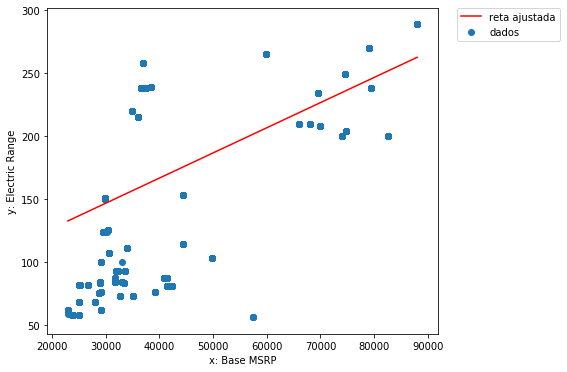

In [57]:
x_vec = np.linspace(x_dados.min(), x_dados.max(), 500)
y_vec = results.predict(sm.add_constant(x_vec))

plt.figure(figsize=(7,6))
plt.plot(x_vec,y_vec, color="r") # resultados da regressão
plt.scatter(x_dados, y_dados); # dados
plt.xlabel("x: Base MSRP")
plt.ylabel("y: Electric Range")
plt.legend(('reta ajustada','dados'), bbox_to_anchor=(1.05, 1), borderaxespad=0.)
plt.show()

<div id="ex4"></div>

### EXERCÍCIO 4 - Resíduos

Gere o `probplot` dos resíduos para verificar a sua normalidade.

**Dica**: Você pode obter o valor dos resíduos no atributo `resid` dos resultados da regressão (`results.resid`).

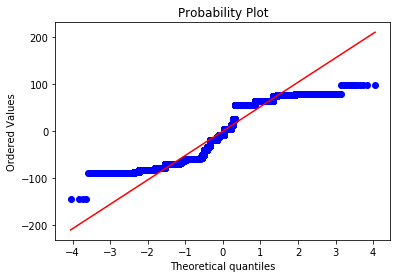

In [35]:
# ESCREVA SEU CÓDIGO AQUI
stats.probplot(results.resid, dist='norm', plot=plt);


Interprete os resultados acima. Você acha que os resíduos formam uma normal? Discuta a homocedasticidade do modelo (a variância dos erros é constante?).

* Pelo gráfico do exercício 4, os pontos fora da linha vermelha (bissetriz) mostram indícios de não adequação para modelar os resíduos.

* Pelo gráfico do exercício 3, observa-se um aumento de variabilidade dos pontos em torno da reta conforme os valores de x (renda per capita) aumentam. ???

<div id="explica"></div>

# Explicação sobre resultados e suposições do modelo de regressão linear:

Os resumo dos resultados da regressão traz informações que nos permitem avaliar a qualidade do ajuste e a validade de:

* Validação das suposições (normalidade, homocedasticidade e independência dos resíduos)
* Teste de hipóteses dos coeficientes do modelo de regressão 

<div id="testet"></div>

### Teste t :  valor-*p*  da estatística t

Existente para cada coeficiente $\beta_i$ do modelo de regressão, testam as seguintes hipóteses:

$H_0: \beta_i = 0$

$H_1: \beta_i \neq 0$

Um valor-*p* (encontrado na coluna `P>|t|`) baixo permite **rejeitar** a hipótese $H_0: \beta_i = 0$. No caso de um modelo de regressão simples, as hipóteses para o coeficiente $\beta_1$ dizem sobre a significância da regressão.

In [273]:
valorp_beta0 = results.pvalues['const']
valorp_beta1 = results.pvalues['Base MSRP']

print('Valor-p sob H0: beta0 = 0: {:.6f}'.format(valorp_beta0))
print('Valor-p sob H0: beta1 = 0: {:.6f}'.format(valorp_beta1))

Valor-p sob H0: beta0 = 0: 0.000000
Valor-p sob H0: beta1 = 0: 0.000000


<div id="r2"></div>

### Coeficiente de determinação $R^2$

É uma medida de quão bem uma regressão capta a variação presente nos dados, ou parafraseando, o quanto de variabilidade nos dados é explicada pelo modelo de regressão.

$$ R^2 = 1 - \frac{SS_E}{SS_T}$$

Para calcular esta fórmula precisamos das relações:

$$SQRes=SS_{E}=\sum\limits^{n}_{i=1}(y_i-\hat{y}_i)^2=\sum\limits_{i=1}^{n}\epsilon^2_{i}$$

$$SQT=SS_{T}=\sum\limits^{n}_{i=1}(y_i-\bar{y})^2$$

O valor de $R^2$ pode ser obtido na coluna `R-squared`.

In [ ]:
SSE = (y_dados - )

### R-squared: 0.283




<div id="r2adj"></div>

### $R^2$ ajustado

Penaliza preditores que não acrescentam poder preditivo significativo. Essa medida é útil em modelo de regressão múltipla.

$$R^2ajustado = R^2 - (1-R^2)\frac{P}{n-p-1}$$

em que $n$ é o número de dados e $p$ é o número de preditores (número de variáveis explicativas)

O valor de $R^2$ ajustado pode ser obtido na coluna `Adj. R-squared`.

### Adj. R-squared: 0.283



<div id="f"></div>

### Estatística F

Testa as seguintes hipóteses:

$H_0: \beta_1 = \beta_2 = \ldots = \beta_p = 0$

$H_1: \beta_i \neq 0$ para no mínimo algum $i$, com $i=1,\ldots,n$ 

A rejeição da hipótese nula implica que no mínimo uma variável explicativa (regressora) contruibui significantemente para o modelo. Esse teste F é mais útil no caso de modelo de regressão múltipla.

O valor p dessa estatística pode ser obtido na coluna `Prob (F-statistic)`. Se ele for menor do que o nível de significância escolhido, rejeitamos $H_0$ em favor de $H_1$ (alguma variável explicativa contribui significativamente para o modelo).

<div id="omnibus"></div>

### Teste Omnibus

Para que o modelo obtido via regressão linear simples possa ser considerado para tomada de decisão é necessário que as [suposições do modelo](#suposicoes) sejam válidas. O teste Omnibus testa a normalidade dos resíduos ($\varepsilon_i$):

$H_0:$ a distribuição dos resíduos é normal

$H_1:$ a distribuição dos resíduos não é normal

O valor-p desse teste pode ser obtido em `Prob(Omnibus)`. Se `Prob(Omnibus)` for muito baixo, existe evidência de que os resíduos **não são** distribuídos normalmente, violando nesse caso a suposição do modelo de regressão. O **ideal** é que esse valor seja maior do que $\alpha$ (nível de significância), assim não rejeitamos $H_0$.



### Prob (Ominibus): 0.000

Portanto, existe evidência de que os resíduos não são distribuídos normalmete, violando a suposição do modelo de regressão.

<div id="jb"></div>

### Teste Jarque-Bera

Outro teste de normalidade dos resíduos:

$H_0:$ a distribuição dos resíduos é normal

$H_1:$ a distribuição dos resíduos não é normal

O valor-p desse teste pode ser obtido em `Prob(JB)`. Se `Prob(JB)` for muito baixo, existe evidência de que os resíduos **não são** distribuídos normalmente, violando nesse caso a suposição do modelo de regressão. O **ideal** é que esse valor seja maior do que $\alpha$ (nível de significância), assim não rejeitamos $H_0$.

Consulte este [link](https://towardsdatascience.com/testing-for-normality-using-skewness-and-kurtosis-afd61be860) para mais detalhes sobre qual o propósito do teste JB para validar normalidade de dados.

### Prob(JB): 0.00

Portanto, isso evidência que os resíduos não são distribuídos normalmente, violando a suposição do modelo de regressão.


<div id="dw"></div>

### Teste Durbin-Watson

Testa a autocorrelação dos resíduos. Uma das [suposições](#suposicoes) é que os resíduos são independentes entre si. Esse valor varia na faixa $[0,4]$:

* Um valor próximo de $2$ sugere que não há autocorrelação dos resíduos
* Um valor menor que $2$ sugere **correlação positiva** dois resíduos
* Um valor maior que $2$ sugere **correlação negativa** dois resíduos

O **ideal** é que o valor de `Durbin-Watson` seja próximo de 2.

### Durbin-Watson: 1.954

Portanto, como o valor é menor que 2, o modelo sugere uma correlação positiva dois resíduos.

<div id="uso"></div>

# Utilização dos resultados e validação das suposições do modelo:

# 2 Modelo do projeto: Regression tree